In [7]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ignore the warnings
import warnings

In [12]:
# Read the .csv files
# Read files from the current directory
#data_dir = os.getcwd()
data_dir = '../battery_simulation/synthetic_datasets'
# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame()
# Get a list of all csv files
csv_files = os.listdir(data_dir)
print(f"The csv files: {csv_files}")
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        print(csv_file)
        # Join the directory path with the filename
        # Remove 'battery_data.csv from the file name'
        scenario = csv_file.replace('_battery_data.csv', '')
        full_path = os.path.join(data_dir, csv_file)
        df = pd.read_csv(full_path)
        df['scenario'] = scenario
        df['Date'] = pd.to_datetime(df['Date'])
        combined_df = pd.concat([combined_df,df], ignore_index = True)

print(f" Number of rows and columns: {np.shape(combined_df)}")
print(f" Information about the dataset: {combined_df.info()}")
print(f"Missing data: {combined_df.isnull().sum()}")
#print(f"Describe the dataset: {combined_df.describe()}")
print(combined_df.tail())

The csv files: ['low_usage_optimal_charging_battery_data.csv', 'normal_usage_optimal_charging_battery_data.csv', 'normal_usage_deep_discharge_charging_battery_data.csv', 'high_usage_optimal_charging_battery_data.csv', 'normal_usage_full_charging_battery_data.csv', 'normal_usage_frequent_top_ups_charging_battery_data.csv']
low_usage_optimal_charging_battery_data.csv
normal_usage_optimal_charging_battery_data.csv
normal_usage_deep_discharge_charging_battery_data.csv
high_usage_optimal_charging_battery_data.csv
normal_usage_full_charging_battery_data.csv
normal_usage_frequent_top_ups_charging_battery_data.csv
 Number of rows and columns: (8766, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8766 non-null   datetime64[ns]
 1   Temperature   8766 non-null   float64       
 2   Charge_Start  8766 non-null   int64 

In [13]:
unique_scenarios = combined_df['scenario'].unique()
print("Unique scenarios in the combined DataFrame:")
print(unique_scenarios)


Unique scenarios in the combined DataFrame:
['low_usage_optimal_charging' 'normal_usage_optimal_charging'
 'normal_usage_deep_discharge_charging' 'high_usage_optimal_charging'
 'normal_usage_full_charging' 'normal_usage_frequent_top_ups_charging']


/var/folders/k5/5w50wg3j0wd0l1361vrp0c9m0000gn/T/ipykernel_3414/2225916462.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  downsampled_df = combined_df.groupby('scenario').apply(lambda x: x.iloc[::n, :]).reset_index(drop=True)


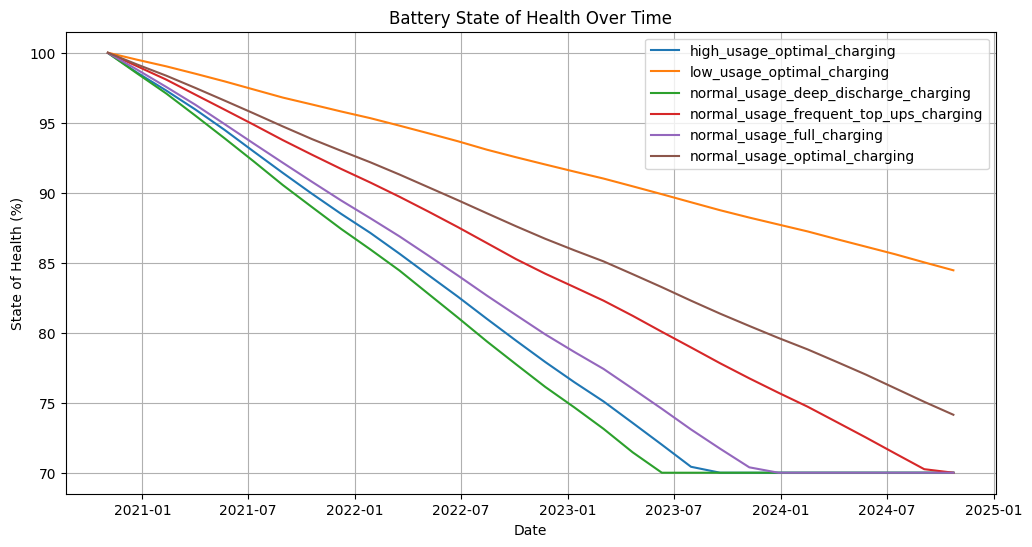

In [14]:
# SOH over time
# Downsample the data
n = 50  # Adjust this value to change the level of downsampling
downsampled_df = combined_df.groupby('scenario').apply(lambda x: x.iloc[::n, :]).reset_index(drop=True)

# Plot the downsampled data
plt.figure(figsize=(12, 6))
for scenario in downsampled_df['scenario'].unique():
    subset = downsampled_df[downsampled_df['scenario'] == scenario]
    plt.plot(subset['Date'], subset['SOH'], label=scenario)

plt.xlabel('Date')
plt.ylabel('State of Health (%)')
plt.title('Battery State of Health Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# SOH over cycle

In [ ]:
# SOH vs temperature

In [ ]:
# SOH and charging behaviour influence